# SHAP Analysis

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.1 MB/s eta 0:00:00


Accuracy: 0.6021505376344086
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       1.00      0.50      0.67         2
moderately suitable       0.29      0.14      0.19        14
       not suitable       0.52      0.75      0.61        20
           suitable       0.54      0.50      0.52        14
      very suitable       0.72      0.72      0.72        43

           accuracy                           0.60        93
          macro avg       0.61      0.52      0.54        93
       weighted avg       0.59      0.60      0.59        93

SHAP values shape: (93, 16, 5)
X_test shape: (93, 16)


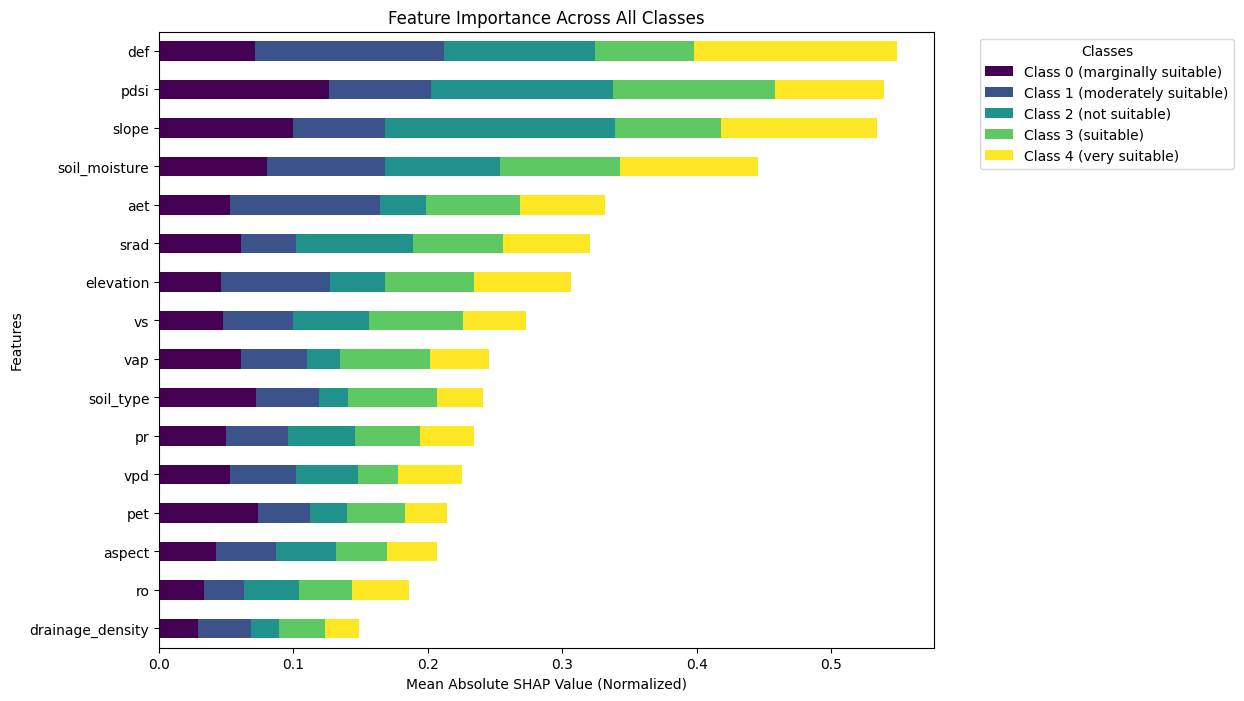

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('aman_final.csv')
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data.drop(columns=['aman'])  # Features
y = data['aman']  # Target variable

# Identify numerical features only
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type', 'elevation']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Use only numerical features
X = X[numerical_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the actual names of the classes
# class_names = model.classes_

# print(class_names)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Verify the shape of shap_values and X_test
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"X_test shape: {X_test.shape}")

# Calculate mean absolute SHAP values for each feature and class
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Normalize SHAP values for each class
normalized_shap_values = mean_abs_shap_values / mean_abs_shap_values.sum(axis=0)

# Transpose normalized_shap_values to match the shape of the features
shap_values_transposed = np.transpose(normalized_shap_values)

# Create DataFrame for plotting
shap_df = pd.DataFrame(shap_values_transposed, columns=numerical_features)

# Calculate total SHAP values and sort features in ascending order
total_shap_values = shap_df.sum(axis=0)
sorted_features = total_shap_values.sort_values(ascending=True).index
shap_df_sorted = shap_df[sorted_features]

# Get the actual names of the classes
class_names = model.classes_

# Create legend labels with class number and corresponding class name in brackets
legend_labels = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]

# Plot combined feature importance with color indicating class importance
fig, ax = plt.subplots(figsize=(10, 8))
shap_df_sorted.T.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Feature Importance Across All Classes')
ax.set_xlabel('Mean Absolute SHAP Value (Normalized)')
ax.set_ylabel('Features')
plt.legend(title='Classes', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# model accuracy

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('aman_final.csv')
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data.drop(columns=['aman'])  # Features
y = data['aman']  # Target variable

# Identify numerical and categorical features, excluding 'district' and 'upazilla'
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type', 'elevation']
categorical_features = ['pdsi_class', 'aet_class', 'vap_class', 'srad_class', 'soil_moisture_class',
                        'pet_class', 'def_class', 'vs_class', 'vpd_class', 'pr_class', 'ro_class',
                        'aspect_class', 'slope_class', 'drainage_class', 'soil_type_class',
                        'elevation_class']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_categorical_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6666666666666666
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.67      1.00      0.80         2
moderately suitable       0.33      0.14      0.20        14
       not suitable       0.60      0.90      0.72        20
           suitable       0.62      0.57      0.59        14
      very suitable       0.78      0.74      0.76        43

           accuracy                           0.67        93
          macro avg       0.60      0.67      0.61        93
       weighted avg       0.65      0.67      0.64        93



In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7887323943661971
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.96      0.96      0.96        50
moderately suitable       0.71      0.92      0.80        39
       not suitable       0.70      0.85      0.77        33
           suitable       0.74      0.70      0.72        40
      very suitable       0.82      0.55      0.66        51

           accuracy                           0.79       213
          macro avg       0.79      0.80      0.78       213
       weighted avg       0.80      0.79      0.78       213



#### updated by chatgpt

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7887323943661971
Classification Report:
                      precision    recall  f1-score   support

marginally suitable       0.96      0.96      0.96        50
moderately suitable       0.71      0.92      0.80        39
       not suitable       0.70      0.85      0.77        33
           suitable       0.74      0.70      0.72        40
      very suitable       0.82      0.55      0.66        51

           accuracy                           0.79       213
          macro avg       0.79      0.80      0.78       213
       weighted avg       0.80      0.79      0.78       213

SHAP values shape: (213, 76, 5)
X_test shape: (213, 76)


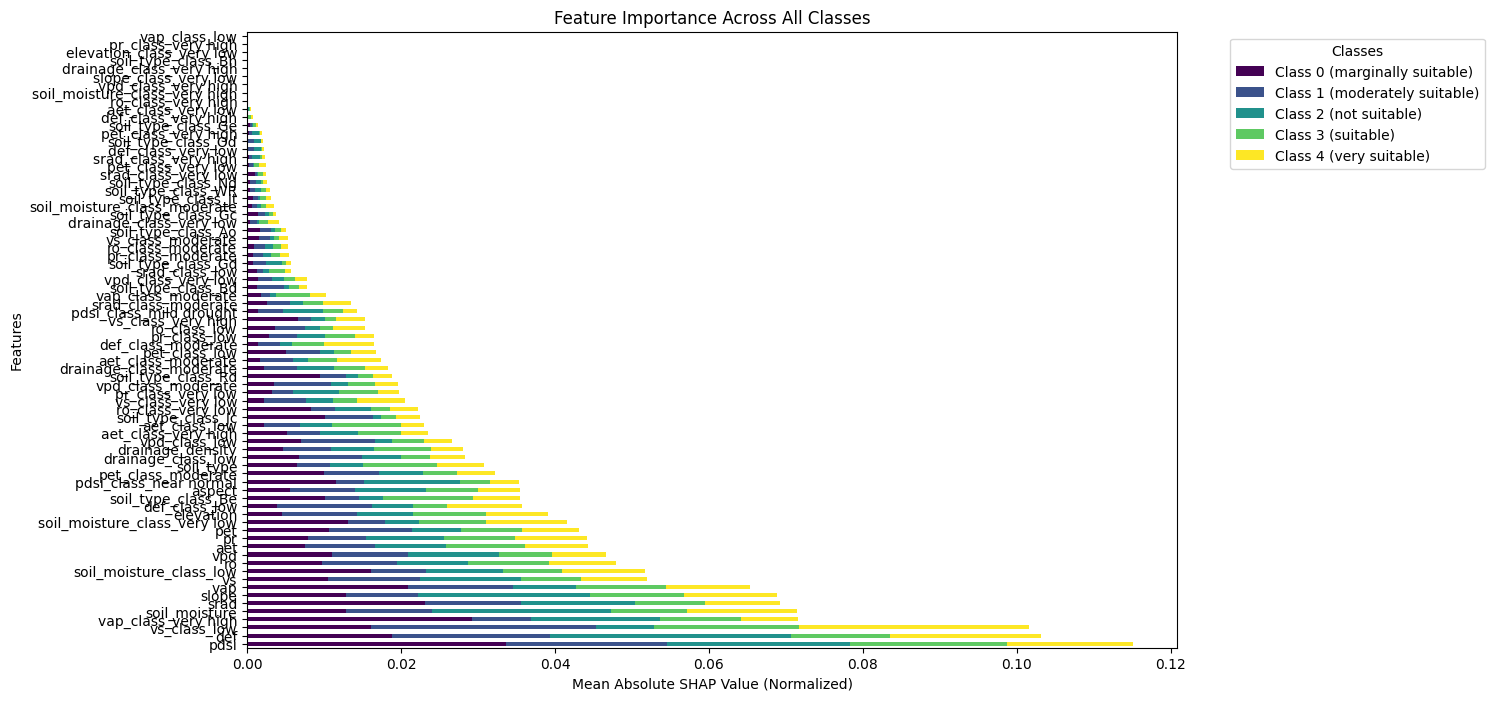

Order of features from most to least important:
pdsi
def
vs_class_low
vap_class_very high
soil_moisture
srad
slope
vap
vs
soil_moisture_class_low
ro
vpd
aet
pr
pet
soil_moisture_class_very low
elevation
def_class_low
soil_type_class_Be
aspect
pdsi_class_near normal
pet_class_moderate
soil_type
drainage_class_low
drainage_density
vpd_class_low
aet_class_very high
aet_class_low
soil_type_class_Jc
ro_class_very low
vs_class_very low
pr_class_very low
vpd_class_moderate
soil_type_class_Rd
drainage_class_moderate
aet_class_moderate
pet_class_low
def_class_moderate
pr_class_low
ro_class_low
vs_class_very high
pdsi_class_mild drought
srad_class_moderate
vap_class_moderate
soil_type_class_Bd
vpd_class_very low
srad_class_low
soil_type_class_Gd
pr_class_moderate
ro_class_moderate
vs_class_moderate
soil_type_class_Ao
drainage_class_very low
soil_type_class_Gc
soil_moisture_class_moderate
soil_type_class_Jt
soil_type_class_WR
soil_type_class_Nd
srad_class_very low
pet_class_very low
srad_class_ve

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('aman_final.csv')
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data.drop(columns=['aman'])  # Features
y = data['aman']  # Target variable

# Identify numerical and categorical features, excluding 'district' and 'upazilla'
numerical_features = ['pdsi', 'aet', 'vap', 'srad', 'soil_moisture', 'pet', 'def', 'vs', 'vpd', 'pr', 'ro', 'aspect', 'slope', 'drainage_density', 'soil_type', 'elevation']
categorical_features = ['pdsi_class', 'aet_class', 'vap_class', 'srad_class', 'soil_moisture_class', 'pet_class', 'def_class', 'vs_class', 'vpd_class', 'pr_class', 'ro_class', 'aspect_class', 'slope_class', 'drainage_class', 'soil_type_class', 'elevation_class']

# Preprocess numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_categorical_df], axis=1)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Apply SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Verify the shape of shap_values and X_test
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"X_test shape: {X_test.shape}")

# Calculate mean absolute SHAP values for each feature and class
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create DataFrame for plotting
shap_df = pd.DataFrame(mean_abs_shap_values, columns=[f'Class {i}' for i in range(mean_abs_shap_values.shape[1])], index=X_test.columns)

# Calculate total SHAP values and sort features in descending order
total_shap_values = shap_df.mean(axis=1)
sorted_features = total_shap_values.sort_values(ascending=False).index
shap_df_sorted = shap_df.loc[sorted_features]

# Get the actual names of the classes
class_names = best_model.classes_

# Create legend labels with class number and corresponding class name in brackets
legend_labels = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]

# Plot combined feature importance with color indicating class importance
fig, ax = plt.subplots(figsize=(12, 8))
shap_df_sorted.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Feature Importance Across All Classes')
ax.set_xlabel('Mean Absolute SHAP Value (Normalized)')
ax.set_ylabel('Features')
plt.legend(title='Classes', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the order of the features
print("Order of features from most to least important:")
for feature in sorted_features:
    print(feature)


# SHAP analysis of levels of most important feature

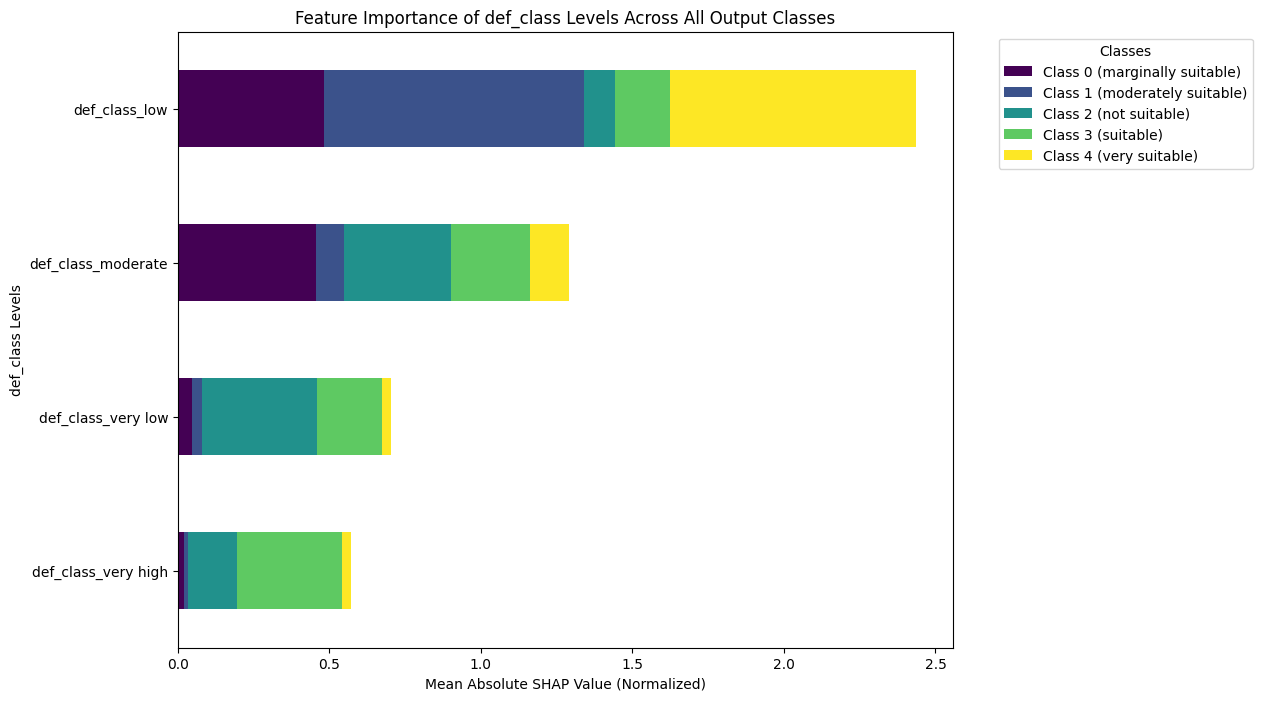

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('aman_final.csv')
data = data.drop(columns=['district', 'upazilla'])

# Separate features and target variable
X = data[['def_class']]  # Use only def_class as features
y = data['aman']  # Target variable

# Preprocess categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Apply one-hot encoding to def_class
X_encoded = categorical_transformer.fit_transform(X)

# Convert the one-hot encoded features back to a DataFrame
encoded_feature_names = categorical_transformer.get_feature_names_out(['def_class'])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the actual names of the classes
class_names = model.classes_

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))

# Apply SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Verify the shape of shap_values and X_test
# print(f"SHAP values shape: {np.array(shap_values).shape}")
# print(f"X_test shape: {X_test.shape}")

# Calculate mean absolute SHAP values for each feature and class
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Normalize SHAP values for each class
normalized_shap_values = mean_abs_shap_values / mean_abs_shap_values.sum(axis=0)

# Transpose normalized_shap_values to match the shape of the features
shap_values_transposed = np.transpose(normalized_shap_values)

# Create DataFrame for plotting
shap_df = pd.DataFrame(shap_values_transposed, columns=encoded_feature_names)

# Calculate total SHAP values and sort features in ascending order
total_shap_values = shap_df.sum(axis=0)
sorted_features = total_shap_values.sort_values(ascending=True).index
shap_df_sorted = shap_df[sorted_features]

# Create legend labels with class number and corresponding class name in brackets
legend_labels = [f"Class {i} ({class_names[i]})" for i in range(len(class_names))]

# Plot combined feature importance with color indicating class importance
fig, ax = plt.subplots(figsize=(10, 8))
shap_df_sorted.T.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Feature Importance of def_class Levels Across All Output Classes')
ax.set_xlabel('Mean Absolute SHAP Value (Normalized)')
ax.set_ylabel('def_class Levels')
plt.legend(title='Classes', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
